### COVID-19

Checkout the latest COVID-19 data. See if you can mine/visualize/analyze the data. Bring your codes on 03/16 in the class.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

try:
    confirmed = pd.read_csv(confirmed_url, error_bad_lines=False)
    deaths = pd.read_csv(deaths_url, error_bad_lines=False)
    recovered = pd.read_csv(recovered_url, error_bad_lines=False)
    print('Reading file is success!')
except:
    print('May URL deprecate...')

Reading file is success!


In [4]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [5]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,19,22,22,27,29,29,29,33,35,40
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,2,2,2,3,4,10


In [6]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,35,35,35,35,41,42,42,42,42,44
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,118,144,144,144,150,191,232,235
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,97,105,105,109,114,114,114,124,140,144
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,26,35,42,42,49,60,75,87,114,139


### Preprocessing

* raname `Province/State` and `Country/Region`
* all date column melted to date

In [7]:
# Preprocessing
confirmed = confirmed.rename(columns={'Province/State':'State', 'Country/Region':'Country',})
deaths = deaths.rename(columns={'Province/State':'State', 'Country/Region':'Country',})
recovered = recovered.rename(columns={'Province/State':'State', 'Country/Region':'Country',})

confirmed_melt = confirmed.melt(id_vars=['State', 'Country', 'Lat', 'Long'], var_name="Date", value_name="Value")
confirmed_melt['Date'] = pd.to_datetime(confirmed_melt.Date)

deaths_melt = deaths.melt(id_vars=['State', 'Country', 'Lat', 'Long'], var_name="Date", value_name="Value")
deaths_melt['Date'] = pd.to_datetime(deaths_melt.Date)

recovered_melt = recovered.melt(id_vars=['State', 'Country', 'Lat', 'Long'], var_name="Date", value_name="Value")
recovered_melt['Date'] = pd.to_datetime(recovered_melt.Date)

print(confirmed_melt.shape, deaths_melt.shape, recovered_melt.shape)

(29707, 6) (29707, 6) (29707, 6)


In [8]:
df = pd.concat([confirmed_melt, deaths_melt['Value'], recovered_melt['Value']], axis=1) 
df.columns = ['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered']

# Active case
df['Active'] = df['Confirmed'] - df['Recovered'] - df['Deaths']
df['State'].fillna('', inplace=True)
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,,Thailand,15.0000,101.0000,2020-01-22,2,0,0,2
1,,Japan,36.0000,138.0000,2020-01-22,2,0,0,2
2,,Singapore,1.2833,103.8333,2020-01-22,0,0,0,0
3,,Nepal,28.1667,84.2500,2020-01-22,0,0,0,0
4,,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,0


In [9]:
# latest 
country_latest = df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
country_latest = country_latest[country_latest['Date']==max(country_latest['Date'])]
country_latest.style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered,Active
60,2020-03-22 00:00:00,335955,14632,97704,223619


In [10]:
# only Taiwan
tw_latest = df[df['Country']=='Taiwan*'].groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
tw_latest = tw_latest[tw_latest['Date']==max(country_latest['Date'])]
tw_latest.style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered,Active
60,2020-03-22 00:00:00,169,2,28,139


### Folium Heatmap: Global lastest situation

In [37]:
confirmed_hm = df.groupby(['Country','Lat','Long'])['Confirmed'].sum().reset_index()
confirmed_hm.head()

,Country,Lat,Long,Confirmed
0,Afghanistan,33.0000,65.0000,249
1,Albania,41.1533,20.1683,624
2,Algeria,28.0339,1.6596,991
3,Andorra,42.5063,1.5218,423
4,Angola,-11.2027,17.8739,5


In [40]:
import folium
from folium.plugins import HeatMap

mapa = folium.Map(location=(10, 10), zoom_start=1.5, tiles="Stamen Toner", height="80%", width="80%")
loc_li = list(zip(list(confirmed_hm.Lat), (confirmed_hm.Long)))
HeatMap(loc_li, radius=15).add_to(mapa) # <-----------------------change radius
mapa

### Gloal confirmed deaths recovered situation

In [86]:
latest_day = df['Date'].max()
latest_df = df[df['Date'] == latest_day]

(-180, 180)

(-90, 90)

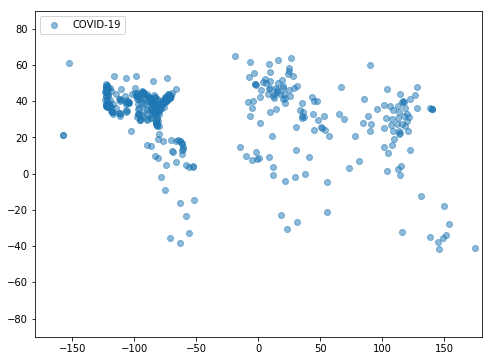

In [89]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(latest_df.Long, latest_df.Lat, alpha=0.5,label="COVID-19")
ax.set_xlim((-180, 180))
ax.set_ylim((-90, 90))
plt.legend(loc='upper left')
plt.show()

In [90]:
import folium
from folium.plugins import HeatMap
mapa = folium.Map(location=(10, 10), zoom_start=1.5, tiles="Stamen Toner", height="60%", width="60%")
loc_li = list(zip(list(latest_df.Lat), (latest_df.Long)))
HeatMap(loc_li, radius=15).add_to(mapa)
mapa

<Figure size 720x432 with 0 Axes>

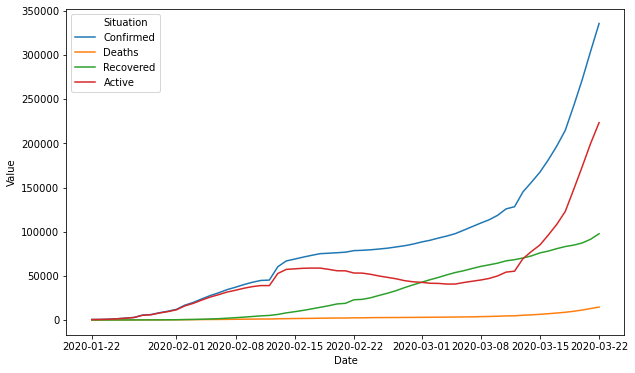

In [36]:
date_all = df.groupby(['Date'])[['Confirmed','Deaths','Recovered','Active']].agg('sum').reset_index()
date_all = date_all.melt(id_vars=['Date'], var_name='Situation', value_name="Value")

plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Value', hue='Situation', data=date_all)
plt.show()

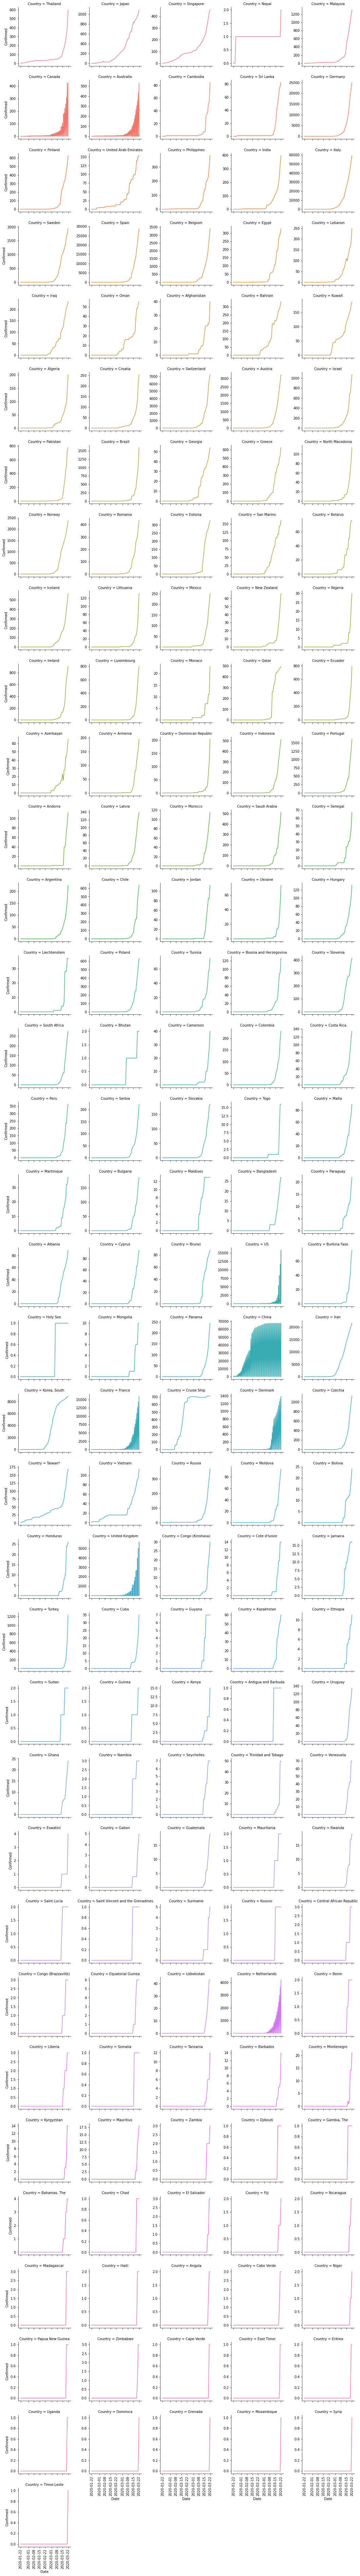

In [37]:
g = sns.FacetGrid(df, col="Country", hue="Country", sharey=False, col_wrap=5)
g = g.map(plt.plot, "Date", "Confirmed")
g.set_xticklabels(rotation=90)
plt.show()

In [38]:
# 確診人數大於100的國家
temp = latest_df.set_index('Country')['Confirmed'].sort_values(ascending=False)
temp = temp[temp.values > 100]
#temp = temp.Confirmed.sort_values(ascending=False)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

_ = ax.bar(temp.index, temp.values, width=0.6)
_ = plt.xticks(rotation='vertical')
plt.show()

NameError: name 'latest_df' is not defined

### Linear model

In [41]:
from sklearn.model_selection import train_test_split

everyday = np.array([i for i in range(len(df['Date'].unique()))]).reshape(-1,1)
forecasting = np.array([i for i in range(len(df['Date'].unique())+ 10)]).reshape(-1,1)
world_cases = df.groupby(['Date'])['Confirmed'].sum().values

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(everyday, world_cases, \
                                                                    test_size=0.2, shuffle=False)

In [73]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_all)
poly_X_test_confirmed = poly.fit_transform(X_test_all)
poly_future_forcast = poly.fit_transform(forecasting)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_all)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)

print('MAE:', mean_absolute_error(test_linear_pred, y_test_all))
print('MSE:',mean_squared_error(test_linear_pred, y_test_all))

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

MAE: 43939.84652935838
MSE: 2764745133.8672414


In [75]:
print(linear_model.coef_)

[ 1.68704501e+03 -9.08454688e+02  2.14159586e+02  1.73170067e+00
 -2.84846728e-01  3.90276682e-03]


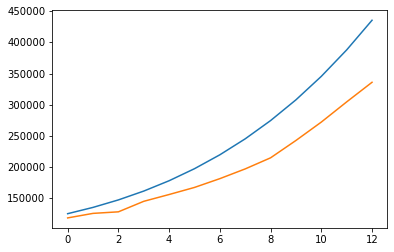

In [71]:
plt.plot(test_linear_pred)
plt.plot(y_test_all)